In [1]:
from gp_1D import *


In [2]:
input_file = '../training_results/1D_500/train_inputs_log.json'
var_file = '../training_results/1D_500/train_outputs_var.json'
output_file = '../training_results/1D_500/train_outputs_mean.json'
input_type = 'I'
output_type = 'P'


In [3]:
gp = LPI_GP_1D(input_file = input_file, input_type = input_type,\
           output_file = output_file, output_type = output_type,\
           var_file = var_file, train_frac=0.001)

In [4]:
gp.set_training_data()

In [5]:
gp.optimise_noise_GP()

l =  0.2 var =  100.0


In [6]:
Y_star, err = gp.noise_GP_predict(gp.X_train, get_err = True)

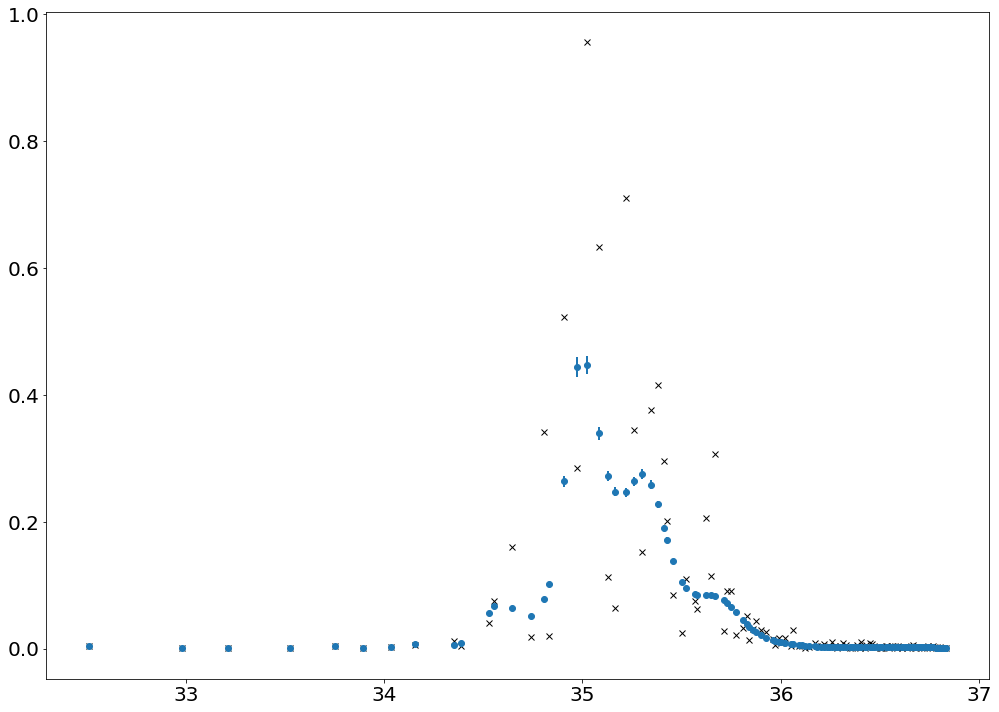

In [7]:
X_s = gp.X_train.flatten()
Y_s = Y_star.flatten()
plt.errorbar(X_s, Y_s, yerr = err.flatten(), fmt="o")
plt.plot(X_s, np.exp(gp.noise_train), 'kx')


In [8]:
gp.optimise_GP()

l =  0.16602950259484825 var =  2.7312044575796683


In [9]:
X_star = np.geomspace(1e14, 1e17, 1000)[:,None]


Y_star, V_epi, V_noise = gp.GP_predict(X_star, get_var=True)

In [10]:
X = np.exp(gp.get_input())
if output_type == 'T':
    Y = gp.get_output()
else:
    Y = np.exp(gp.get_output())

In [11]:
X_all = read_json_file('../training_results/1D_500/all_inputs.json')
Y_all = read_json_file('../training_results/1D_500/all_outputs.json')


In [12]:
if input_type == 'I':
    X_all = X_all[:,0]
if input_type == 'Ln':
    X_all = X_all[:,1]

if output_type == 'P':
    Y_all = Y_all[:,0].flatten()
if output_type == 'T':
    Y_all = Y_all[:,1].flatten()
if output_type == 'E':
    Y_all = Y_all[:,2].flatten()


 <ipython-input-13-4fea8fb0ee7c>:13: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.


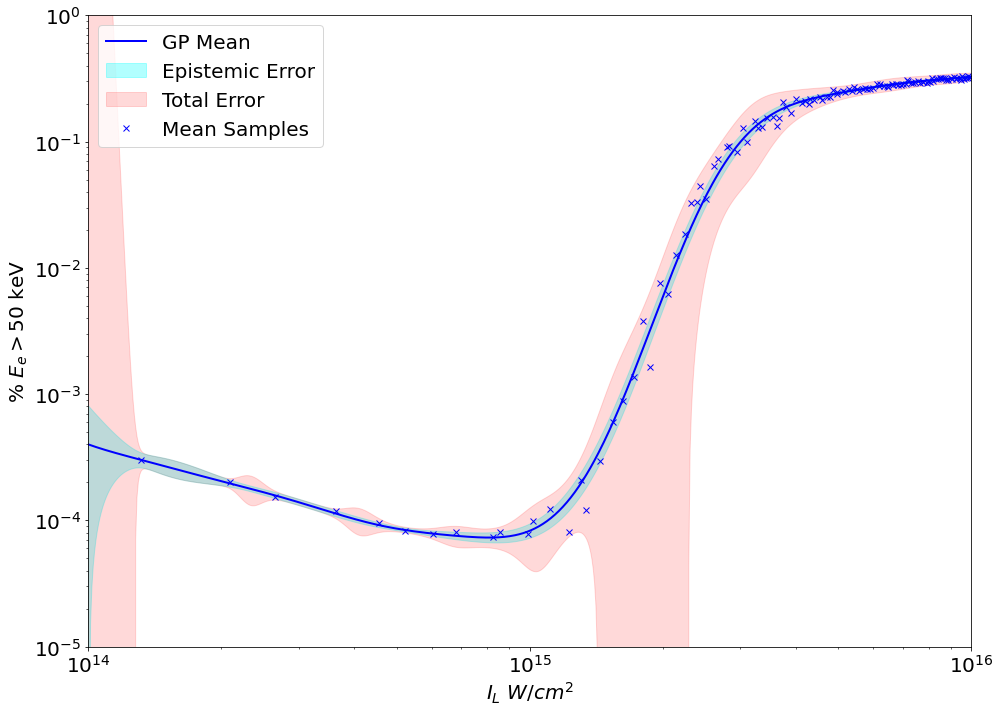

In [13]:
plt.rcParams["figure.figsize"] = [14, 10]

error_epi = 2.0*np.sqrt(V_epi)
error_tot = 2.0*np.sqrt(V_epi + V_noise)

Y_s = Y_star.flatten()
X_s = X_star.flatten()

plt.loglog(X_s, Y_s, color = 'blue', label = 'GP Mean')
plt.fill_between(X_s, (Y_s-error_epi), (Y_s+error_epi), alpha = 0.3, color = 'cyan', label = 'Epistemic Error')
plt.fill_between(X_s, (Y_s-error_tot), (Y_s+error_tot), alpha = 0.15, color = 'red', label = 'Total Error')
# plt.plot(X_all, Y_all, 'kx', color = 'red', label = 'All Samples', alpha = 0.8)
plt.plot(X, Y, 'kx', color = 'blue', label = 'Mean Samples')
plt.xlim(1e14, 1e16)
if output_type == 'T':
    plt.ylim(4, 25)
else:
    plt.ylim(1e-5, 1e0)
plt.ylabel(r'$\% \,\, E_{e} > 50$ keV')
plt.xlabel(r'$I_{L} \,\, W/cm^{2}$')
plt.legend(loc = 0)